# Importing and loading data

In [279]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score


In [280]:
# Load the dataset
current_path = os.getcwd()
parent_folder = os.path.dirname(current_path)
data_file_path = os.path.join(parent_folder, "Data", "sp500.csv") # import weekly data

df = pd.read_csv(str(data_file_path))

df['Date'] = pd.to_datetime(df['Date'], utc=True)
df.sort_values('Date', inplace=True)
df.set_index('Date', inplace=True)

# viewing data

In [281]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 05:00:00+00:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 05:00:00+00:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 05:00:00+00:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 05:00:00+00:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 05:00:00+00:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2025-04-11 04:00:00+00:00,5255.560059,5381.459961,5220.770020,5363.359863,5602550000,0.0,0.0
2025-04-14 04:00:00+00:00,5441.959961,5459.459961,5358.020020,5405.970215,5031440000,0.0,0.0
2025-04-15 04:00:00+00:00,5411.990234,5450.410156,5386.439941,5396.629883,4317110000,0.0,0.0


In [282]:
df.index

DatetimeIndex(['1927-12-30 05:00:00+00:00', '1928-01-03 05:00:00+00:00',
               '1928-01-04 05:00:00+00:00', '1928-01-05 05:00:00+00:00',
               '1928-01-06 05:00:00+00:00', '1928-01-09 05:00:00+00:00',
               '1928-01-10 05:00:00+00:00', '1928-01-11 05:00:00+00:00',
               '1928-01-12 05:00:00+00:00', '1928-01-13 05:00:00+00:00',
               ...
               '2025-04-04 04:00:00+00:00', '2025-04-07 04:00:00+00:00',
               '2025-04-08 04:00:00+00:00', '2025-04-09 04:00:00+00:00',
               '2025-04-10 04:00:00+00:00', '2025-04-11 04:00:00+00:00',
               '2025-04-14 04:00:00+00:00', '2025-04-15 04:00:00+00:00',
               '2025-04-16 04:00:00+00:00', '2025-04-17 04:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=24440, freq=None)

<Axes: xlabel='Date'>

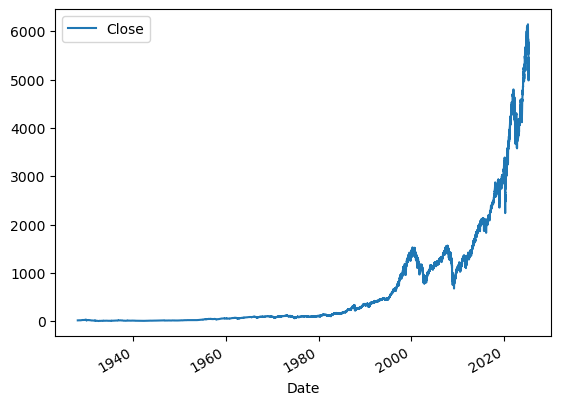

In [283]:
df.plot.line(y='Close', use_index=True)

# removing unneccesary data and creating new features

In [284]:
del df['Dividends']
del df['Stock Splits']

In [285]:
df['Next'] = df['Close'].shift(-1)

# creating the target

In [286]:
df['Target'] = (df['Next'] > df['Close']).astype(int)

In [287]:
df

,Open,High,Low,Close,Volume,Next,Target
Date,,,,,,,
1927-12-30 05:00:00+00:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 05:00:00+00:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 05:00:00+00:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 05:00:00+00:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 05:00:00+00:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2025-04-11 04:00:00+00:00,5255.560059,5381.459961,5220.770020,5363.359863,5602550000,5405.970215,1
2025-04-14 04:00:00+00:00,5441.959961,5459.459961,5358.020020,5405.970215,5031440000,5396.629883,0
2025-04-15 04:00:00+00:00,5411.990234,5450.410156,5386.439941,5396.629883,4317110000,5275.700195,0


# taking only data from 1990 onwards

In [288]:
df = df.loc["1990-01-01":].copy()

In [289]:
df

,Open,High,Low,Close,Volume,Next,Target
Date,,,,,,,
1990-01-02 05:00:00+00:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 05:00:00+00:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 05:00:00+00:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 05:00:00+00:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 05:00:00+00:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2025-04-11 04:00:00+00:00,5255.560059,5381.459961,5220.770020,5363.359863,5602550000,5405.970215,1
2025-04-14 04:00:00+00:00,5441.959961,5459.459961,5358.020020,5405.970215,5031440000,5396.629883,0
2025-04-15 04:00:00+00:00,5411.990234,5450.410156,5386.439941,5396.629883,4317110000,5275.700195,0


# splitting data into testing and training while defining the ML model

In [290]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = df.iloc[:-100]
test = df.iloc[-100:]

predictors = ['Close', 'Volume', 'Open', 'High', 'Low']
model.fit(train[predictors], train['Target'])



RandomForestClassifier(min_samples_split=100, random_state=1)

# prediction stats

In [291]:
preds = model.predict(test[predictors])

In [292]:
preds

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [293]:
preds = pd.Series(preds, index=test.index)

In [294]:
precision_score(test['Target'], preds)

0.5111111111111111

In [295]:
combined = pd.concat([test['Target'], preds], axis = 1)

<Axes: xlabel='Date'>

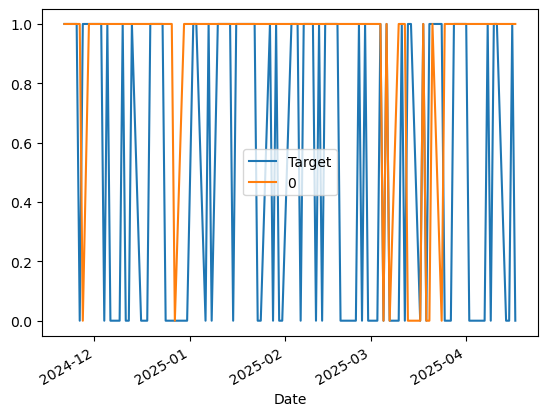

In [296]:
combined.plot()

# defining prediction and backtesting functions

In [297]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train['Target'])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name ='Predictions')
    combined = pd.concat([test['Target'], preds], axis=1)
    return combined

In [298]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train=data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions=predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [299]:
predictions = backtest(df, model, predictors)

In [300]:
predictions["Predictions"].value_counts()

Predictions
0    3736
1    2654
Name: count, dtype: int64

In [301]:
precision_score(predictions['Target'], predictions['Predictions'])

0.5286360211002261

In [302]:
predictions['Target'].value_counts() / predictions.shape[0]

Target
1    0.535681
0    0.464319
Name: count, dtype: float64

# creates moving averages as new features

In [ ]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = df.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    df[ratio_column] = df["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    df[trend_column] = df.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors+= [ratio_column, trend_column]

In [304]:
df = df.dropna()

In [305]:
df

,Open,High,Low,Close,Volume,Next,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 05:00:00+00:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 05:00:00+00:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 05:00:00+00:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 05:00:00+00:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 05:00:00+00:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-10 04:00:00+00:00,5353.149902,5353.149902,5115.270020,5268.049805,6677140000,5363.359863,1,0.982392,1.0,1.019200,1.0,0.905387,30.0,0.932187,140.0,1.131575,525.0
2025-04-11 04:00:00+00:00,5255.560059,5381.459961,5220.770020,5363.359863,5602550000,5405.970215,1,1.008965,1.0,1.026153,2.0,0.923318,30.0,0.948892,141.0,1.151744,526.0
2025-04-14 04:00:00+00:00,5441.959961,5459.459961,5358.020020,5405.970215,5031440000,5396.629883,0,1.003957,2.0,1.020879,3.0,0.932075,31.0,0.956197,142.0,1.160587,526.0


# Reconfiguring ML model and retraining

In [306]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [307]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >=.6] = 1
    preds[preds <.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined



# new persicion scores

In [308]:
predictions = backtest(df, model, new_predictors)

In [309]:
predictions["Predictions"].value_counts()

Predictions
0.0    4520
1.0     869
Name: count, dtype: int64

In [310]:
precision_score(predictions['Target'], predictions['Predictions']) #0.57 is actually decent since stock markets are volatile

0.5742232451093211

In [311]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.545185
0    0.454815
Name: count, dtype: float64

In [312]:
predictions

,Target,Predictions
Date,,
2003-11-14 05:00:00+00:00,0,0.0
2003-11-17 05:00:00+00:00,0,1.0
2003-11-18 05:00:00+00:00,1,1.0
2003-11-19 05:00:00+00:00,0,0.0
2003-11-20 05:00:00+00:00,1,1.0
...,...,...
2025-04-10 04:00:00+00:00,1,0.0
2025-04-11 04:00:00+00:00,1,0.0
2025-04-14 04:00:00+00:00,0,0.0
